### Analyze test image

In [1]:
# installing openCV
!pip install opencv-python 

In [2]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Reading the test image 
img = cv2.imread('img.jpg') 

In [6]:
#extracting the dimension of the image
img.shape

(450, 720, 3)

In [7]:
#first pixel representation in test image using array
img[0]

array([[241, 237, 236],
       [241, 237, 236],
       [241, 237, 236],
       ...,
       [235, 232, 228],
       [236, 233, 229],
       [236, 233, 229]], dtype=uint8)

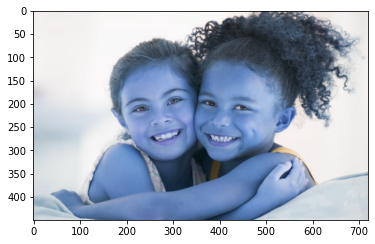

In [8]:
#plotting the test image in graphical form
plt.imshow(img)

In [9]:
while True:
    cv2.imshow('result', img)
    #27 - ASCII number of Escape
    if cv2.waitKey(2) == 27: #wait
        break
cv2.destroyAllWindows()

#the wait key waits for an operation ifinetly or for a given delay.
#Therefore, when the escape key is pressed, it waits for exactly 2milli-seconds before executing the next line of code.

### Face Detection

In [10]:
#uploadind the harrcascade classifier file used for detecting faces

harr_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
#detecting the haar features in the two faces from test image and returning it as an array.

harr_data.detectMultiScale(img)

array([[163, 123, 211, 211],
       [327, 143, 174, 174]])

In [12]:
#cv2.rectangle(img,(x,y),(w,h),(b,g,r),border_thickness)

In [93]:
#Marking the rectangle on detected face from test image 
while True:
    faces = harr_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w, y+h), (255,0,255), 1) # Marking recatangle on detected face
    cv2.imshow('result', img) # getting the mrked and detected face image
    #27 - ASCII of Escape
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

### Dataset collection

In [65]:
#collecting the dataset for with and without Mask from live camera
capture = cv2.VideoCapture(0)
data =[]
while True:
    flag, img = capture.read()
    if flag:
        faces = harr_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w, y+h), (111, 0, 111), 1)
            face = img[y:y+h, x:x+w, :]
            #resizing all detected face
            face= cv2.resize(face, (50,50))
            print(len(data))
            if len(data) < 1000: #Collecting 1000 images for the dataset for with and without mask
                data.append(face)
        cv2.imshow('result', img)
        #27 - ASCII of Escape
        if cv2.waitKey(2) == 27 or len(data) >=1000:
            break 
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
#saving the collected data for without mask in .npy file format
np.save('without_mask.npy', data)

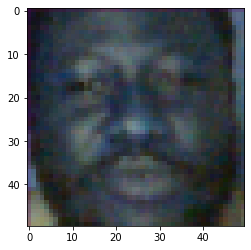

In [63]:
#plotting single image from the collected data
plt.imshow(data[100])

In [64]:
#checking the same above result in RGB color
while True:
    cv2.imshow('result', img)
    #27 - ASCII of Escape
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

In [59]:
#plt.imshow(data[0]) 
#shows you image of yourface without mask

In [66]:
np.save('with_mask.npy', data)

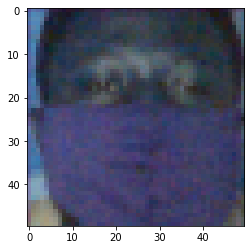

In [67]:
plt.imshow(data[0])

In [68]:
#checking the same above result for wi in RGB color
while True:
    cv2.imshow('result', img)
    #27 - ASCII of Escape
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

In [69]:
#Loading of collected dataset
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [70]:
#checking the current shape of collected images(4 X 4 Dimension)
with_mask.shape

(1000, 50, 50, 3)

In [71]:
#checking the current shape of collected images(4 X 4 dimension)
without_mask.shape

(1000, 50, 50, 3)

### Resizing the both two dataset

In [72]:
#resizing all two dataset images with same shape (2 X 2 dimension)
with_mask = with_mask.reshape(1000, 50 * 50 * 3)
without_mask = without_mask.reshape(1000, 50 * 50 * 3)

In [73]:
#checking the new shape of with mask dataset (2 X 2 dimension)
with_mask.shape

(1000, 7500)

In [74]:
#checking the new shape of without mask dataset (2 X 2 dimension)
without_mask.shape

(1000, 7500)

In [75]:
#combining the two datasets we have
X = np.r_[with_mask, without_mask] 

In [76]:
X.shape

(2000, 7500)

In [77]:
labels = np.zeros(X.shape[0])

In [78]:
labels[1000:] = 1.0

In [79]:
names = {0 : 'with_Mask', 1: 'Without_Mask'}

### Machine learning Section

In [80]:
#svm - Support Vector Machine
#SVC - Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [81]:
#splitting of data into trainning and testing datasets

from sklearn.model_selection import train_test_split

In [82]:
#75% of the data will be used for training
#25% of the data will be used for testing

x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = 0.25)

In [83]:
#training datasize
x_train.shape

(1500, 7500)

In [84]:
# demensionality deduction with principle component analysis
from sklearn.decomposition import PCA

In [85]:
#converting the data from 7500 dimensional to 3 dimensional data
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)

In [86]:
x_train[0]

array([-1.87405516e+03,  4.54157123e-01,  5.91691767e+02])

In [87]:
#current shape of data
x_train.shape

(1500, 3)

In [88]:
#shuffuling of data
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = 0.25)

In [89]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [90]:
y_pred = svm.predict(x_test)

In [91]:
#checking the accuracy
accuracy_score(y_test, y_pred)

0.982

In [92]:
#face mask detection
haar_data =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face= cv2.resize(face, (50,50))
            face= face.reshape(1, -1)
            pred = svm.predict(face)[0]
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (244,250,250), 2)
            print(n)
        cv2.imshow('result', img)
        #27-ASCII of Escape
        if cv2.waitKey(2) == 27:
            break
            
capture.release()
cv2.destroyAllWindows()

Without_Mask
Without_Mask
Without_Mask
Without_Mask
with_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
with_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
with_Mask
Without_Mask
with_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
with_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
Without_Mask
with_Mask
Without_Mask
Without_Mask
Without_Mask
with_Mask
Without_Mask
with_Mask
with_Mask
Without_Mask
with_Mask
Without_Mask
with_Mask
Without_Mask
Withou